<a href="https://colab.research.google.com/github/brainmentorspvtltd/MSIT_FDP_DeepLearning/blob/main/SimpleGAN_MSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv2DTranspose, Reshape, BatchNormalization, LeakyReLU

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train / 255, x_test / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32
tf_data = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [18]:
def make_generator_model():
  model = tf.keras.Sequential()

  model.add(Dense(7*7*256, input_shape=(100,)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Reshape((7,7,256)))
  model.add(Conv2DTranspose(128, (5,5), strides=(1,1), padding="same"))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2DTranspose(64, (5,5), strides=(2,2), padding="same"))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(1, (5,5), strides=(2,2), padding="same"))
  assert model.output_shape == (None, 28, 28, 1)
  return model

In [19]:
generator = make_generator_model()

In [20]:
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12544)             1266944   
                                                                 
 batch_normalization_9 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 7, 7, 128)        819328    
 ranspose)                                                       
                                                                 
 batch_normalization_10 (Bat  (None, 7, 7, 128)       

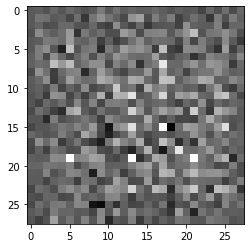

In [24]:
noise = tf.random.normal([1,100])
generated_image = generator(noise, training = False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [23]:
generated_image.shape

TensorShape([1, 28, 28, 1])

In [25]:
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(Conv2D(64, (5,5), strides=(2,2), padding="same", input_shape=(28,28,1)))
  model.add(LeakyReLU())

  model.add(Conv2D(128, (5,5), strides=(2,2), padding="same"))
  model.add(LeakyReLU())

  model.add(Flatten())
  model.add(Dense(1))

  return model

In [29]:
discriminator = discriminator_model()
output = discriminator(generated_image)

In [30]:
print(output)

tf.Tensor([[0.00589556]], shape=(1, 1), dtype=float32)
